<center><h2>Tweets Classification</h2></center>

<p>For real time streaming tweets classification we need to train a model for prediction.</p>

In [41]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud

pd.options.display.max_colwidth = 300 
pass

In [42]:
data = pd.read_csv("data.csv")
data.head()

,post,usertag,time_date,label,__key__,__error__,__has_error__
0,NaN,NaN,NaN,NaN,"{\n ""__key__"": {\n ""namespace"": """",\n ""app"": ""s~liquid-anchor-419214"",\n ""path"": ""\""posts\"", \""startingdoc\"""",\n ""kind"": ""posts"",\n ""name"": ""startingdoc"",\n ""id"": null\n }\n}",[],False
1,https://foxnews.com/politics/doj-torched-prosecutors-announce-sam-bankman-fried-face-second-trial…\nThe Department of (In)Justice doing its job protecting the #NaziDemocrats by keeping their treasonous crimes covered up. #NaziScums #ResistingDemocratFascism #DemocratsTheNewNazis #IStandWithIsrae...,@Big0range31,2023-12-30 22:55:29,I,"{\n ""__key__"": {\n ""namespace"": """",\n ""app"": ""s~liquid-anchor-419214"",\n ""path"": ""\""posts\"", \""5SltHdL2FYtDuVweFRXg\"""",\n ""kind"": ""posts"",\n ""name"": ""5SltHdL2FYtDuVweFRXg"",\n ""id"": null\n }\n}",[],False
2,#IStandWithIsrael “thousands at event calling for the country's resettlement of Gaza - NBC News,@LorraineMayLevy,2024-01-29 13:45:32,I,"{\n ""__key__"": {\n ""namespace"": """",\n ""app"": ""s~liquid-anchor-419214"",\n ""path"": ""\""posts\"", \""5EGsMYmUyHTQeVd27d2c\"""",\n ""kind"": ""posts"",\n ""name"": ""5EGsMYmUyHTQeVd27d2c"",\n ""id"": null\n }\n}",[],False
3,"#istandwithisrael and not #istandwithjews means you stand for this : Israel is a militarised ethno state. \n\nStand with the Jewish people, not the barbarians responsible for this, the IDF *is* The state of Israel.",@SapphosShahuda,2023-11-29 00:21:06,I,"{\n ""__key__"": {\n ""namespace"": """",\n ""app"": ""s~liquid-anchor-419214"",\n ""path"": ""\""posts\"", \""5EdJPNUV8Mw4xprgaOCu\"""",\n ""kind"": ""posts"",\n ""name"": ""5EdJPNUV8Mw4xprgaOCu"",\n ""id"": null\n }\n}",[],False
4,"The images of Hamas' brutality are gruesome — reminiscent of the worst of Al-Qaeda, ISIS and the Taliban.\n\nUrge America's leaders to #StandWithIsrael as it defeats this terrorist threat:",@Deborah83556516,2024-01-26 02:35:05,I,"{\n ""__key__"": {\n ""namespace"": """",\n ""app"": ""s~liquid-anchor-419214"",\n ""path"": ""\""posts\"", \""5H9s7aG3b8v8wunxXV3B\"""",\n ""kind"": ""posts"",\n ""name"": ""5H9s7aG3b8v8wunxXV3B"",\n ""id"": null\n }\n}",[],False


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13163 entries, 0 to 13162
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post           13162 non-null  object
 1   usertag        13162 non-null  object
 2   time_date      13162 non-null  object
 3   label          13162 non-null  object
 4   __key__        13163 non-null  object
 5   __error__      13163 non-null  object
 6   __has_error__  13163 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 630.0+ KB


In [44]:
data.columns = ["text","usertag","date","label","__key__","__error__","__has_error__"]
data = data.astype(str)
data["target"] = data["label"].apply(lambda x: 0 if x == "P" else 1)

<p>No error in the dataset</p>

In [45]:
data["__has_error__"].unique()

array(['False'], dtype=object)

<p>we will drop __key__, __error__ and __has__error__ columns. The key column uniquely identifies all rows even the one with duplicate tweets. </p>

In [46]:
data.drop(["__key__","__error__","__has_error__"],axis=1,inplace=True)

In [47]:
data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 11952 entries, 0 to 13162
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     11952 non-null  object
 1   usertag  11952 non-null  object
 2   date     11952 non-null  object
 3   label    11952 non-null  object
 4   target   11952 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 560.2+ KB


<p>There is a bias in the data, we need to make sure there are as many posts in favor of palestine as there is in favor of israel.</p>

In [48]:
data["label"].value_counts()

label
P      7678
I      5484
nan       1
Name: count, dtype: int64

<center><h2>Text processing</h2></center>

In [49]:
data["text"].head(5)

0                                                                                                                                                                                                                                                                                                            nan
1    https://foxnews.com/politics/doj-torched-prosecutors-announce-sam-bankman-fried-face-second-trial…\nThe Department of (In)Justice doing its job protecting the #NaziDemocrats by keeping their treasonous crimes covered up. #NaziScums #ResistingDemocratFascism #DemocratsTheNewNazis #IStandWithIsrae...
2                                                                                                                                                                                                                #IStandWithIsrael “thousands at event calling for the country's resettlement of Gaza - NBC News
3                                                                                    

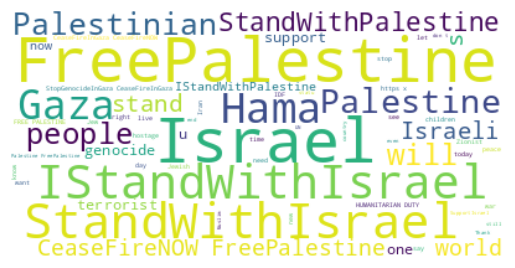

In [50]:
text = " ".join(review for review in data["text"])
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Removing URLs, Mentions, Emojis

In [51]:
import preprocessor as p
p.set_options(p.OPT.URL,p.OPT.MENTION,p.OPT.RESERVED,p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.NUMBER)
data["text"] = data["text"].apply(lambda x : p.clean(x))

In [52]:
data["text"]

0                                                                                                                                                                                                                                                                    nan
1                                                   The Department of (In)Justice doing its job protecting the #NaziDemocrats by keeping their treasonous crimes covered up. #NaziScums #ResistingDemocratFascism #DemocratsTheNewNazis #IStandWithIsrael #SupportIsrael
2                                                                                                                                                                         #IStandWithIsrael thousands at event calling for the country's resettlement of Gaza - NBC News
3                                                     #istandwithisrael and not #istandwithjews means you stand for this : Israel is a militarised ethno state. Stand with the Jewish people, not the barbari

#### Expanding contractions

In [53]:
import re
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
data['text']=data['text'].apply(lambda x:expand_contractions(str(x)))

#### Lower case

In [54]:
data["text"] = data["text"].str.lower()

#### Removing punctuation

In [55]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
data['text'] = data['text'].apply(lambda x: re.sub(f'[{re.escape(punctuation)}]', '' , str(x)))

#### Stopwords

In [57]:
from wordcloud import STOPWORDS

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in STOPWORDS]))

#### Lemmatization 

In [58]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["text"] = data["text"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /home/ayoub/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


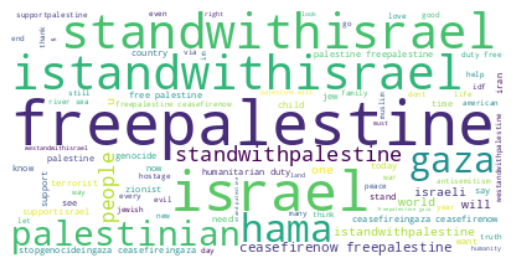

In [59]:
text = " ".join(review for review in data["text"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

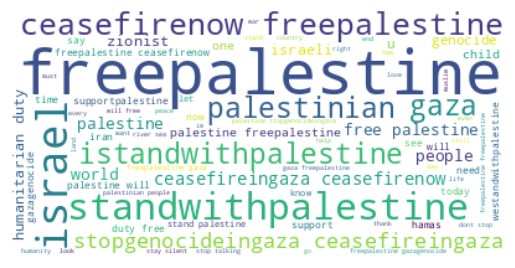

In [60]:
text = " ".join(review for review in data.loc[data["label"] == "P"]["text"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

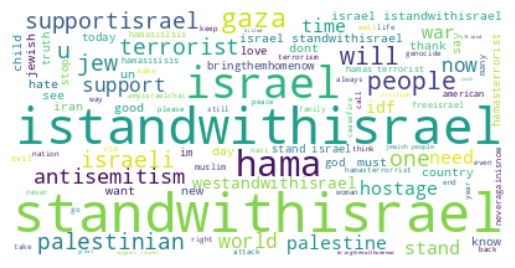

In [61]:
text = " ".join(review for review in data.loc[data["label"] == "I"]["text"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
data.head(10)["text"]

0                                                                                                                                                                                                            nan
1                                      department injustice job protecting nazidemocrats keeping treasonous crime covered naziscums resistingdemocratfascism democratsthenewnazis istandwithisrael supportisrael
2                                                                                                                                     istandwithisrael thousand event calling country resettlement gaza nbc news
3                                                                           istandwithisrael istandwithjews mean stand israel militarised ethno state stand jewish people barbarian responsible idf state israel
4                                                                               image hamas brutality gruesome reminiscent worst alqaeda isi taliban urge america le

<center><h2>Model training</h2></center>

#### Train test Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["text"],data["target"], test_size=0.20,random_state=42)